# Generalized ESD Test

The Generalized ESD Test is a statistical procedure that can detect up to k outliers in a dataset without knowing exactly how many outliers there are in advance.

#### Evolution from Grubbs' Test:

Grubbs' Test: Can only detect ONE outlier at a time

Generalized ESD: Can detect MULTIPLE outliers (you specify maximum k)

Key Insight: The test iteratively removes the most extreme outlier and recalculates test statistics, making it robust for datasets with multiple outliers.

### How It Works - Step by Step

##### Pre-test Setup:

Specify k - the maximum number of potential outliers to test for

Choose significance level α (typically 0.05)

#### The Algorithm:

Calculate the test statistic for all points: R_i = |x_i - mean| / std

Remove the point with the largest R_i

Recalculate mean and standard deviation on remaining data

Repeat steps 1-3 for k iterations

Compare each R_i with critical values λ_i

### Step-by-Step Example
``` Let's work through a detailed example:```

``` Dataset: [8, 10, 12, 13, 14, 19, 25, 30, 100]```
``` Parameters: k = 3, α = 0.05```
```bash
Iteration 1:

Original data: [8, 10, 12, 13, 14, 19, 25, 30, 100]

Mean = 25.67, Std = 29.27

Calculate R-values:


R(8)   = |8 - 25.67| / 29.27 = 0.60
R(10)  = |10 - 25.67| / 29.27 = 0.54
R(12)  = |12 - 25.67| / 29.27 = 0.47
R(13)  = |13 - 25.67| / 29.27 = 0.43
R(14)  = |14 - 25.67| / 29.27 = 0.40
R(19)  = |19 - 25.67| / 29.27 = 0.23
R(25)  = |25 - 25.67| / 29.27 = 0.02
R(30)  = |30 - 25.67| / 29.27 = 0.15
R(100) = |100 - 25.67| / 29.27 = 2.54  ← Largest!
Critical value λ₁ = 2.215

Since 2.54 > 2.215 → 100 is an outlier

Iteration 2:

Remove 100: New data = [8, 10, 12, 13, 14, 19, 25, 30]

Mean = 16.38, Std = 8.14

Calculate R-values:


R(8)  = |8 - 16.38| / 8.14 = 1.03
R(10) = |10 - 16.38| / 8.14 = 0.78
R(12) = |12 - 16.38| / 8.14 = 0.54
R(13) = |13 - 16.38| / 8.14 = 0.42
R(14) = |14 - 16.38| / 8.14 = 0.29
R(19) = |19 - 16.38| / 8.14 = 0.32
R(25) = |25 - 16.38| / 8.14 = 1.06
R(30) = |30 - 16.38| / 8.14 = 1.67  ← Largest!
Critical value λ₂ = 2.176

Since 1.67 < 2.176 → 30 is NOT an outlier

Result: Only one outlier detected (100)



```

#### When to Use Generalized ESD Test
Excellent for:

Unknown number of outliers (you suspect multiple but don't know how many)

Formal statistical testing (academic papers, regulated industries)

Quality control processes

Scientific data analysis where rigor is required

#### Key Advantages:

Specify maximum k - don't need to know exact number of outliers

Iterative refinement - recalculates after each removal

Statistical rigor - proper hypothesis testing framework

Widely accepted - standard in many fields

#### Limitations:

Assumes data is approximately normally distributed

Requires specifying maximum number of outliers k

Can be computationally intensive for large k

Sensitive to the initial mean/std estimates

=== Example 1: Multiple Outliers ===
Testing up to 3 outliers at α=0.05

Iteration Results:
Iter 1: Value=60, R=2.422, λ=2.412 ✓ OUTLIER
Iter 2: Value=50, R=2.843, λ=2.355 ✓ OUTLIER

=== Example 2: Borderline Case ===
Iter 1: Value=30, R=2.535, λ=2.290 ✓ OUTLIER


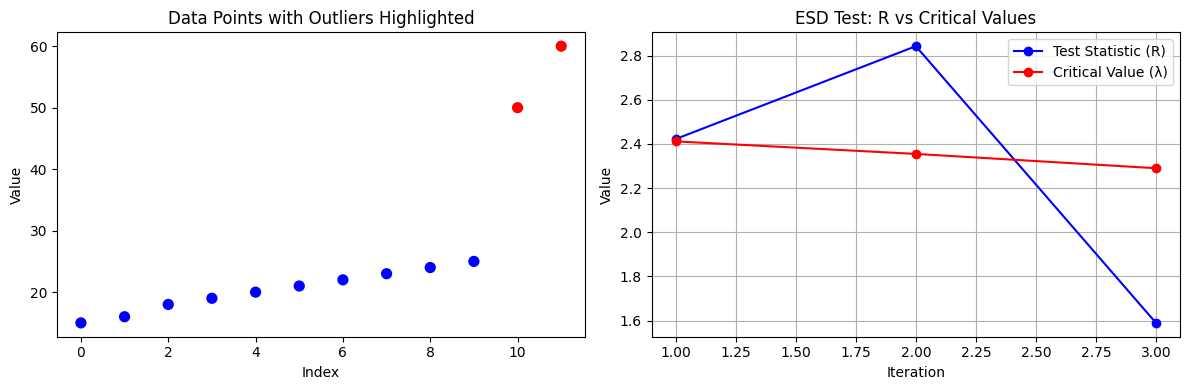

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def generalized_esd_test(data, k, alpha=0.05):
    """
    Perform Generalized ESD Test for Outliers
    """
    data = np.array(data)
    n = len(data)
    
    # Pre-calculate critical values
    critical_values = []
    for i in range(1, k + 1):
        p = 1 - alpha / (2 * (n - i + 1))
        t_value = stats.t.ppf(p, n - i - 1)
        numerator = (n - i) * t_value
        denominator = np.sqrt((n - i - 1 + t_value**2) * (n - i + 1))
        critical_values.append(numerator / denominator)
    
    # Perform iterative testing
    test_statistics = []
    outliers = []
    current_data = data.copy()
    outlier_indices = []
    
    for i in range(k):
        if len(current_data) == 0:
            break
            
        # Calculate mean and standard deviation
        mean = np.mean(current_data)
        std = np.std(current_data, ddof=1)
        
        # Calculate R values (test statistics)
        r_values = np.abs(current_data - mean) / std
        max_r = np.max(r_values)
        max_idx = np.argmax(r_values)
        
        test_statistics.append(max_r)
        
        # Check if this point is an outlier
        if max_r > critical_values[i]:
            # Find original index of this outlier
            original_idx = np.where(data == current_data[max_idx])[0][0]
            outliers.append({
                'iteration': i + 1,
                'value': current_data[max_idx],
                'original_index': original_idx,
                'test_statistic': max_r,
                'critical_value': critical_values[i],
                'is_outlier': True
            })
            outlier_indices.append(original_idx)
            
            # Remove this outlier for next iteration
            current_data = np.delete(current_data, max_idx)
        else:
            # No more outliers detected
            break
    
    return {
        'outliers': outliers,
        'test_statistics': test_statistics,
        'critical_values': critical_values,
        'k': k,
        'alpha': alpha
    }

# Example 1: Clear multiple outliers
print("=== Example 1: Multiple Outliers ===")
data1 = [15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 50, 60]
result1 = generalized_esd_test(data1, k=3, alpha=0.05)

print(f"Testing up to {result1['k']} outliers at α={result1['alpha']}")
print("\nIteration Results:")
for outlier in result1['outliers']:
    status = "✓ OUTLIER" if outlier['is_outlier'] else "Not outlier"
    print(f"Iter {outlier['iteration']}: Value={outlier['value']}, "
          f"R={outlier['test_statistic']:.3f}, λ={outlier['critical_value']:.3f} {status}")

# Example 2: Borderline case
print("\n=== Example 2: Borderline Case ===")
data2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 30]  # 30 might be outlier
result2 = generalized_esd_test(data2, k=2, alpha=0.05)

for outlier in result2['outliers']:
    status = "✓ OUTLIER" if outlier['is_outlier'] else "Not outlier"
    print(f"Iter {outlier['iteration']}: Value={outlier['value']}, "
          f"R={outlier['test_statistic']:.3f}, λ={outlier['critical_value']:.3f} {status}")

# Visualization
def plot_esd_results(data, result):
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Original data with outliers highlighted
    plt.subplot(1, 2, 1)
    colors = ['red' if i in [o['original_index'] for o in result['outliers']] 
             else 'blue' for i in range(len(data))]
    plt.scatter(range(len(data)), data, c=colors, s=50)
    plt.title('Data Points with Outliers Highlighted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    
    # Plot 2: Test statistics vs critical values
    plt.subplot(1, 2, 2)
    iterations = range(1, len(result['test_statistics']) + 1)
    plt.plot(iterations, result['test_statistics'][:len(iterations)], 
             'bo-', label='Test Statistic (R)')
    plt.plot(iterations, result['critical_values'][:len(iterations)], 
             'ro-', label='Critical Value (λ)')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('ESD Test: R vs Critical Values')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_esd_results(data1, result1)